In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spacy
spa_lex = spacy.load('es_core_news_md')
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
import pyperclip

In [3]:
import re

# Dataframes

In [4]:
# DATAFRAMES ORIGINALES

df_prueba1 = pd.read_csv('../../Bases de datos/Secundaria/palabras_corregidas_secundaria.csv', encoding='latin1')
df_prueba2 = pd.read_csv('../../Bases de datos/Secundaria/SECUNDARIA_PRUEBA2.csv', encoding='latin1')
df_prueba3 = pd.read_csv('../../Bases de datos/Secundaria/SECUNDARIA_PRUEBA3.csv', encoding='latin1')

# DATAFRAMES PRUEBA 1

df_1_1 = df_prueba1['clean_por_que_pelota_que_canta']
df_1_2 = df_prueba1['clean_explica_lo_que_quiere_decir_mi_hermanito_es_una_pelota_de_gritos']
df_1_3 = df_prueba1['por_que_pelota_de_pelos']
df_1_4 = df_prueba1['clean_explica_tu_respuesta_en_la_frase_pelota_de_plata']

# DATAFRAMES PRUEBA 2

df_2_1 = df_prueba2['c1t']
df_2_2 = df_prueba2['c2t']
df_2_3 = df_prueba2['c3t']
df_2_4 = df_prueba2['c4t']
df_2_5 = df_prueba2['c5t']
df_2_6 = df_prueba2['c6t']
df_2_7 = df_prueba2['c7t']
df_2_8 = df_prueba2['c8t']
df_2_9 = df_prueba2['c9t']
df_2_10 = df_prueba2['c10t']
df_2_11 = df_prueba2['c11t']
df_2_12 = df_prueba2['c12t']
df_2_13 = df_prueba2['c13t']
df_2_14 = df_prueba2['c14t']
df_2_15 = df_prueba2['c15t']
df_2_16 = df_prueba2['c16t']
df_2_17 = df_prueba2['c17t']
df_2_18 = df_prueba2['c18t']

# DATAFRAMES PRUEBA 3

dfs_prueba3 = {}

for x in range(1,28):
    dfs_temp = []
    dfs_temp.append(df_prueba3[f'que_significa_{x}'][(df_prueba3[f"es_posible_{x}"] == 'si')])
    dfs_temp.append(df_prueba3[f'por_que_crees_que_si_o_no_es_posible_{x}'][(df_prueba3[f"es_posible_{x}"] == 'si')])
    dfs_temp.append(df_prueba3[f'que_significa_{x}'][(df_prueba3[f"es_posible_{x}"] == 'no')])
    dfs_temp.append(df_prueba3[f'por_que_crees_que_si_o_no_es_posible_{x}'][(df_prueba3[f"es_posible_{x}"] == 'no')])
    dfs_prueba3[x] = dfs_temp

# dfs_prueba3[27][0] # si
# dfs_prueba3[27][1] # si
# dfs_prueba3[27][2] # no
# dfs_prueba3[27][3] # no

# Funciones

In [31]:
def extract_data(df_col:object, exceptions:dict={}) -> dict:
    """Extrae informacion de una col, combina palabras contenidas en exceptions"""
    s = """"""
    for ans in df_col: # unir todas las cols en un texto gigante
        s+=str(ans)
        s+=" "
    s = s.replace('  ',' ') # eliminar dobles espacios
    
    for key in exceptions: # unir resultados de palabras similares
        s = s.replace(exceptions[key],key)
    doc = spa_lex(s)
    
    # POS Tagging
    sustantivos = [token.text for token in doc if token.pos_ == "NOUN"]
    verbos =      [token.lemma_ for token in doc if token.pos_ == "VERB"]
    adjetivos =   [token.lemma_ for token in doc if token.pos_ == "ADJ"]
    adverbios =   [token.lemma_ for token in doc if token.pos_ == "ADV"]
    
    # limpiar texto
    clean_tokens = []
    for token in doc:
        # CRITERIO DE CLASIFICACION DE STOPWORD
        if token.is_stop or token.is_punct or token.is_quote or len(token) == 1 or token.text in ['(',')','!']:
            pass # stopword
        else:
            clean_tokens.append(token.text)
    results = {'tokens':clean_tokens,'sustantivos':sustantivos,'verbos':verbos,'adjetivos':adjetivos,'adverbios':adverbios}
    return results

In [6]:
def plot_freq_dist(array:list, title:str='FreqDist', most_frequent:int=0, plot_size:tuple=(16,8), print_query:bool=True, print_df:bool=False) -> None:
    """Obtiene una freqdist de cada token, imprime las N mas frecuentes, la col origen y genera la grafica"""
    unique = set(array)
    instances = []
    
    array_in_text = """"""
    array_in_text += ' ' # se agrega un espacio para que entre la regex
    array_in_text += '  '.join(array)
    array_in_text += ' ' # se agrega un espacio para que entre la regex
    for unique_elem in unique: # obtener el conteo de elems
        instances.append(len(re.findall(f'\s{unique_elem}\s',array_in_text)))
        
    data = {'Token':list(unique), 'Instancias':instances}
    df_data = pd.DataFrame(data)
    df_data = df_data.sort_values(by=['Instancias'], ascending=False)
    query = df_data.head(most_frequent) # los N mas frecuentes
    if print_query is True: display(query) # imprime el resultado de la query
    if print_df is True: display(df_data)  # imprime el dataframe completo de la freqdist
        
    plt.figure(figsize=(plot_size[0], plot_size[1])) # tamano del plot
    ax = sns.barplot(x='Token', y='Instancias', data=query).set_title(title)

# Generar xlsx de Resultados (crudos)

In [41]:
def generate_df(array:list) -> object:
    """Genera un dataframe con freqdist con cols 'Token' e 'Instancias' por cada col de info"""
    unique = set(array)
    instances = []
    array_in_text = """"""
    array_in_text += ' ' # se agrega un espacio para que entre la regex
    array_in_text += '  '.join(array)
    array_in_text += ' ' # se agrega un espacio para que entre la regex
    for unique_elem in unique: # obtener el conteo de elems
        instances.append(len(re.findall(f'\s{unique_elem}\s',array_in_text)))
    data = {'Token':list(unique), 'Instancias':instances}
    df_data = pd.DataFrame(data)
    df_data = df_data.sort_values(by=['Instancias'], ascending=False)
    return df_data


data = extract_data(df_1_1)
df_1_1_sus = generate_df(data['sustantivos'])
df_1_1_ver = generate_df(data['verbos'])
df_1_1_adj = generate_df(data['adjetivos'])
df_1_1_adv = generate_df(data['adverbios'])

data = extract_data(df_1_2)
df_1_2_sus = generate_df(data['sustantivos'])
df_1_2_ver = generate_df(data['verbos'])
df_1_2_adj = generate_df(data['adjetivos'])
df_1_2_adv = generate_df(data['adverbios'])

data = extract_data(df_1_3)
df_1_3_sus = generate_df(data['sustantivos'])
df_1_3_ver = generate_df(data['verbos'])
df_1_3_adj = generate_df(data['adjetivos'])
df_1_3_adv = generate_df(data['adverbios'])

data = extract_data(df_1_4)
df_1_4_sus = generate_df(data['sustantivos'])
df_1_4_ver = generate_df(data['verbos'])
df_1_4_adj = generate_df(data['adjetivos'])
df_1_4_adv = generate_df(data['adverbios'])

data = extract_data(df_2_1)
df_2_1_sus = generate_df(data['sustantivos'])
df_2_1_ver = generate_df(data['verbos'])
df_2_1_adj = generate_df(data['adjetivos'])
df_2_1_adv = generate_df(data['adverbios'])

data = extract_data(df_2_2)
df_2_2_sus = generate_df(data['sustantivos'])
df_2_2_ver = generate_df(data['verbos'])
df_2_2_adj = generate_df(data['adjetivos'])
df_2_2_adv = generate_df(data['adverbios'])

data = extract_data(df_2_3)
df_2_3_sus = generate_df(data['sustantivos'])
df_2_3_ver = generate_df(data['verbos'])
df_2_3_adj = generate_df(data['adjetivos'])
df_2_3_adv = generate_df(data['adverbios'])

data = extract_data(df_2_4)
df_2_4_sus = generate_df(data['sustantivos'])
df_2_4_ver = generate_df(data['verbos'])
df_2_4_adj = generate_df(data['adjetivos'])
df_2_4_adv = generate_df(data['adverbios'])

data = extract_data(df_2_5)
df_2_5_sus = generate_df(data['sustantivos'])
df_2_5_ver = generate_df(data['verbos'])
df_2_5_adj = generate_df(data['adjetivos'])
df_2_5_adv = generate_df(data['adverbios'])

data = extract_data(df_2_6)
df_2_6_sus = generate_df(data['sustantivos'])
df_2_6_ver = generate_df(data['verbos'])
df_2_6_adj = generate_df(data['adjetivos'])
df_2_6_adv = generate_df(data['adverbios'])

data = extract_data(df_2_7)
df_2_7_sus = generate_df(data['sustantivos'])
df_2_7_ver = generate_df(data['verbos'])
df_2_7_adj = generate_df(data['adjetivos'])
df_2_7_adv = generate_df(data['adverbios'])

data = extract_data(df_2_8)
df_2_8_sus = generate_df(data['sustantivos'])
df_2_8_ver = generate_df(data['verbos'])
df_2_8_adj = generate_df(data['adjetivos'])
df_2_8_adv = generate_df(data['adverbios'])

data = extract_data(df_2_9)
df_2_9_sus = generate_df(data['sustantivos'])
df_2_9_ver = generate_df(data['verbos'])
df_2_9_adj = generate_df(data['adjetivos'])
df_2_9_adv = generate_df(data['adverbios'])

data = extract_data(df_2_10)
df_2_10_sus = generate_df(data['sustantivos'])
df_2_10_ver = generate_df(data['verbos'])
df_2_10_adj = generate_df(data['adjetivos'])
df_2_10_adv = generate_df(data['adverbios'])

data = extract_data(df_2_11)
df_2_11_sus = generate_df(data['sustantivos'])
df_2_11_ver = generate_df(data['verbos'])
df_2_11_adj = generate_df(data['adjetivos'])
df_2_11_adv = generate_df(data['adverbios'])

data = extract_data(df_2_12)
df_2_12_sus = generate_df(data['sustantivos'])
df_2_12_ver = generate_df(data['verbos'])
df_2_12_adj = generate_df(data['adjetivos'])
df_2_12_adv = generate_df(data['adverbios'])

data = extract_data(df_2_13)
df_2_13_sus = generate_df(data['sustantivos'])
df_2_13_ver = generate_df(data['verbos'])
df_2_13_adj = generate_df(data['adjetivos'])
df_2_13_adv = generate_df(data['adverbios'])

data = extract_data(df_2_14)
df_2_14_sus = generate_df(data['sustantivos'])
df_2_14_ver = generate_df(data['verbos'])
df_2_14_adj = generate_df(data['adjetivos'])
df_2_14_adv = generate_df(data['adverbios'])

data = extract_data(df_2_15)
df_2_15_sus = generate_df(data['sustantivos'])
df_2_15_ver = generate_df(data['verbos'])
df_2_15_adj = generate_df(data['adjetivos'])
df_2_15_adv = generate_df(data['adverbios'])

data = extract_data(df_2_16)
df_2_16_sus = generate_df(data['sustantivos'])
df_2_16_ver = generate_df(data['verbos'])
df_2_16_adj = generate_df(data['adjetivos'])
df_2_16_adv = generate_df(data['adverbios'])

data = extract_data(df_2_17)
df_2_17_sus = generate_df(data['sustantivos'])
df_2_17_ver = generate_df(data['verbos'])
df_2_17_adj = generate_df(data['adjetivos'])
df_2_17_adv = generate_df(data['adverbios'])

data = extract_data(df_2_18)
df_2_18_sus = generate_df(data['sustantivos'])
df_2_18_ver = generate_df(data['verbos'])
df_2_18_adj = generate_df(data['adjetivos'])
df_2_18_adv = generate_df(data['adverbios'])


all_dfs = {
    'df_1_1_sus_token': df_1_1_sus['Token'],
    'df_1_1_sus_count': df_1_1_sus['Instancias'],
    'df_1_1_ver_token': df_1_1_ver['Token'],
    'df_1_1_ver_count': df_1_1_ver['Instancias'],
    'df_1_1_adj_token': df_1_1_adj['Token'],
    'df_1_1_adj_count': df_1_1_adj['Instancias'],
    'df_1_1_adv_token': df_1_1_adv['Token'],
    'df_1_1_adv_count': df_1_1_adv['Instancias'],
    'df_1_2_sus_token': df_1_2_sus['Token'],
    'df_1_2_sus_count': df_1_2_sus['Instancias'],
    'df_1_2_ver_token': df_1_2_ver['Token'],
    'df_1_2_ver_count': df_1_2_ver['Instancias'],
    'df_1_2_adj_token': df_1_2_adj['Token'],
    'df_1_2_adj_count': df_1_2_adj['Instancias'],
    'df_1_2_adv_token': df_1_2_adv['Token'],
    'df_1_2_adv_count': df_1_2_adv['Instancias'],
    'df_1_3_sus_token': df_1_3_sus['Token'],
    'df_1_3_sus_count': df_1_3_sus['Instancias'],
    'df_1_3_ver_token': df_1_3_ver['Token'],
    'df_1_3_ver_count': df_1_3_ver['Instancias'],
    'df_1_3_adj_token': df_1_3_adj['Token'],
    'df_1_3_adj_count': df_1_3_adj['Instancias'],
    'df_1_3_adv_token': df_1_3_adv['Token'],
    'df_1_3_adv_count': df_1_3_adv['Instancias'],
    'df_1_4_sus_token': df_1_4_sus['Token'],
    'df_1_4_sus_count': df_1_4_sus['Instancias'],
    'df_1_4_ver_token': df_1_4_ver['Token'],
    'df_1_4_ver_count': df_1_4_ver['Instancias'],
    'df_1_4_adj_token': df_1_4_adj['Token'],
    'df_1_4_adj_count': df_1_4_adj['Instancias'],
    'df_1_4_adv_token': df_1_4_adv['Token'],
    'df_1_4_adv_count': df_1_4_adv['Instancias'],
    'df_2_1_sus_token': df_2_1_sus['Token'],
    'df_2_1_sus_count': df_2_1_sus['Instancias'],
    'df_2_1_ver_token': df_2_1_ver['Token'],
    'df_2_1_ver_count': df_2_1_ver['Instancias'],
    'df_2_1_adj_token': df_2_1_adj['Token'],
    'df_2_1_adj_count': df_2_1_adj['Instancias'],
    'df_2_1_adv_token': df_2_1_adv['Token'],
    'df_2_1_adv_count': df_2_1_adv['Instancias'],
    'df_2_2_sus_token': df_2_2_sus['Token'],
    'df_2_2_sus_count': df_2_2_sus['Instancias'],
    'df_2_2_ver_token': df_2_2_ver['Token'],
    'df_2_2_ver_count': df_2_2_ver['Instancias'],
    'df_2_2_adj_token': df_2_2_adj['Token'],
    'df_2_2_adj_count': df_2_2_adj['Instancias'],
    'df_2_2_adv_token': df_2_2_adv['Token'],
    'df_2_2_adv_count': df_2_2_adv['Instancias'],
    'df_2_3_sus_token': df_2_3_sus['Token'],
    'df_2_3_sus_count': df_2_3_sus['Instancias'],
    'df_2_3_ver_token': df_2_3_ver['Token'],
    'df_2_3_ver_count': df_2_3_ver['Instancias'],
    'df_2_3_adj_token': df_2_3_adj['Token'],
    'df_2_3_adj_count': df_2_3_adj['Instancias'],
    'df_2_3_adv_token': df_2_3_adv['Token'],
    'df_2_3_adv_count': df_2_3_adv['Instancias'],
    'df_2_4_sus_token': df_2_4_sus['Token'],
    'df_2_4_sus_count': df_2_4_sus['Instancias'],
    'df_2_4_ver_token': df_2_4_ver['Token'],
    'df_2_4_ver_count': df_2_4_ver['Instancias'],
    'df_2_4_adj_token': df_2_4_adj['Token'],
    'df_2_4_adj_count': df_2_4_adj['Instancias'],
    'df_2_4_adv_token': df_2_4_adv['Token'],
    'df_2_4_adv_count': df_2_4_adv['Instancias'],
    'df_2_5_sus_token': df_2_5_sus['Token'],
    'df_2_5_sus_count': df_2_5_sus['Instancias'],
    'df_2_5_ver_token': df_2_5_ver['Token'],
    'df_2_5_ver_count': df_2_5_ver['Instancias'],
    'df_2_5_adj_token': df_2_5_adj['Token'],
    'df_2_5_adj_count': df_2_5_adj['Instancias'],
    'df_2_5_adv_token': df_2_5_adv['Token'],
    'df_2_5_adv_count': df_2_5_adv['Instancias'],
    'df_2_6_sus_token': df_2_6_sus['Token'],
    'df_2_6_sus_count': df_2_6_sus['Instancias'],
    'df_2_6_ver_token': df_2_6_ver['Token'],
    'df_2_6_ver_count': df_2_6_ver['Instancias'],
    'df_2_6_adj_token': df_2_6_adj['Token'],
    'df_2_6_adj_count': df_2_6_adj['Instancias'],
    'df_2_6_adv_token': df_2_6_adv['Token'],
    'df_2_6_adv_count': df_2_6_adv['Instancias'],
    'df_2_7_sus_token': df_2_7_sus['Token'],
    'df_2_7_sus_count': df_2_7_sus['Instancias'],
    'df_2_7_ver_token': df_2_7_ver['Token'],
    'df_2_7_ver_count': df_2_7_ver['Instancias'],
    'df_2_7_adj_token': df_2_7_adj['Token'],
    'df_2_7_adj_count': df_2_7_adj['Instancias'],
    'df_2_7_adv_token': df_2_7_adv['Token'],
    'df_2_7_adv_count': df_2_7_adv['Instancias'],
    'df_2_8_sus_token': df_2_8_sus['Token'],
    'df_2_8_sus_count': df_2_8_sus['Instancias'],
    'df_2_8_ver_token': df_2_8_ver['Token'],
    'df_2_8_ver_count': df_2_8_ver['Instancias'],
    'df_2_8_adj_token': df_2_8_adj['Token'],
    'df_2_8_adj_count': df_2_8_adj['Instancias'],
    'df_2_8_adv_token': df_2_8_adv['Token'],
    'df_2_8_adv_count': df_2_8_adv['Instancias'],
    'df_2_9_sus_token': df_2_9_sus['Token'],
    'df_2_9_sus_count': df_2_9_sus['Instancias'],
    'df_2_9_ver_token': df_2_9_ver['Token'],
    'df_2_9_ver_count': df_2_9_ver['Instancias'],
    'df_2_9_adj_token': df_2_9_adj['Token'],
    'df_2_9_adj_count': df_2_9_adj['Instancias'],
    'df_2_9_adv_token': df_2_9_adv['Token'],
    'df_2_9_adv_count': df_2_9_adv['Instancias'],
    'df_2_10_sus_token': df_2_10_sus['Token'],
    'df_2_10_sus_count': df_2_10_sus['Instancias'],
    'df_2_10_ver_token': df_2_10_ver['Token'],
    'df_2_10_ver_count': df_2_10_ver['Instancias'],
    'df_2_10_adj_token': df_2_10_adj['Token'],
    'df_2_10_adj_count': df_2_10_adj['Instancias'],
    'df_2_10_adv_token': df_2_10_adv['Token'],
    'df_2_10_adv_count': df_2_10_adv['Instancias'],
    'df_2_11_sus_token': df_2_11_sus['Token'],
    'df_2_11_sus_count': df_2_11_sus['Instancias'],
    'df_2_11_ver_token': df_2_11_ver['Token'],
    'df_2_11_ver_count': df_2_11_ver['Instancias'],
    'df_2_11_adj_token': df_2_11_adj['Token'],
    'df_2_11_adj_count': df_2_11_adj['Instancias'],
    'df_2_11_adv_token': df_2_11_adv['Token'],
    'df_2_11_adv_count': df_2_11_adv['Instancias'],
    'df_2_12_sus_token': df_2_12_sus['Token'],
    'df_2_12_sus_count': df_2_12_sus['Instancias'],
    'df_2_12_ver_token': df_2_12_ver['Token'],
    'df_2_12_ver_count': df_2_12_ver['Instancias'],
    'df_2_12_adj_token': df_2_12_adj['Token'],
    'df_2_12_adj_count': df_2_12_adj['Instancias'],
    'df_2_12_adv_token': df_2_12_adv['Token'],
    'df_2_12_adv_count': df_2_12_adv['Instancias'],
    'df_2_13_sus_token': df_2_13_sus['Token'],
    'df_2_13_sus_count': df_2_13_sus['Instancias'],
    'df_2_13_ver_token': df_2_13_ver['Token'],
    'df_2_13_ver_count': df_2_13_ver['Instancias'],
    'df_2_13_adj_token': df_2_13_adj['Token'],
    'df_2_13_adj_count': df_2_13_adj['Instancias'],
    'df_2_13_adv_token': df_2_13_adv['Token'],
    'df_2_13_adv_count': df_2_13_adv['Instancias'],
    'df_2_14_sus_token': df_2_14_sus['Token'],
    'df_2_14_sus_count': df_2_14_sus['Instancias'],
    'df_2_14_ver_token': df_2_14_ver['Token'],
    'df_2_14_ver_count': df_2_14_ver['Instancias'],
    'df_2_14_adj_token': df_2_14_adj['Token'],
    'df_2_14_adj_count': df_2_14_adj['Instancias'],
    'df_2_14_adv_token': df_2_14_adv['Token'],
    'df_2_14_adv_count': df_2_14_adv['Instancias'],
    'df_2_15_sus_token': df_2_15_sus['Token'],
    'df_2_15_sus_count': df_2_15_sus['Instancias'],
    'df_2_15_ver_token': df_2_15_ver['Token'],
    'df_2_15_ver_count': df_2_15_ver['Instancias'],
    'df_2_15_adj_token': df_2_15_adj['Token'],
    'df_2_15_adj_count': df_2_15_adj['Instancias'],
    'df_2_15_adv_token': df_2_15_adv['Token'],
    'df_2_15_adv_count': df_2_15_adv['Instancias'],
    'df_2_16_sus_token': df_2_16_sus['Token'],
    'df_2_16_sus_count': df_2_16_sus['Instancias'],
    'df_2_16_ver_token': df_2_16_ver['Token'],
    'df_2_16_ver_count': df_2_16_ver['Instancias'],
    'df_2_16_adj_token': df_2_16_adj['Token'],
    'df_2_16_adj_count': df_2_16_adj['Instancias'],
    'df_2_16_adv_token': df_2_16_adv['Token'],
    'df_2_16_adv_count': df_2_16_adv['Instancias'],
    'df_2_17_sus_token': df_2_17_sus['Token'],
    'df_2_17_sus_count': df_2_17_sus['Instancias'],
    'df_2_17_ver_token': df_2_17_ver['Token'],
    'df_2_17_ver_count': df_2_17_ver['Instancias'],
    'df_2_17_adj_token': df_2_17_adj['Token'],
    'df_2_17_adj_count': df_2_17_adj['Instancias'],
    'df_2_17_adv_token': df_2_17_adv['Token'],
    'df_2_17_adv_count': df_2_17_adv['Instancias'],
    'df_2_18_sus_token': df_2_18_sus['Token'],
    'df_2_18_sus_count': df_2_18_sus['Instancias'],
    'df_2_18_ver_token': df_2_18_ver['Token'],
    'df_2_18_ver_count': df_2_18_ver['Instancias'],
    'df_2_18_adj_token': df_2_18_adj['Token'],
    'df_2_18_adj_count': df_2_18_adj['Instancias'],
    'df_2_18_adv_token': df_2_18_adv['Token'],
    'df_2_18_adv_count': df_2_18_adv['Instancias']
}

In [42]:
for x in range(1,28):
    for y in range(0,4):
        data = extract_data(dfs_prueba3[x][y])
        sus = generate_df(data['sustantivos'])
        ver = generate_df(data['verbos'])
        adj = generate_df(data['adjetivos'])
        adv = generate_df(data['adverbios'])
        all_dfs[f'df_3_{x}_{y}_sus_token'] = sus['Token']
        all_dfs[f'df_3_{x}_{y}_sus_count'] = sus['Instancias']
        all_dfs[f'df_3_{x}_{y}_ver_token'] = ver['Token']
        all_dfs[f'df_3_{x}_{y}_ver_count'] = ver['Instancias']
        all_dfs[f'df_3_{x}_{y}_adj_token'] = adj['Token']
        all_dfs[f'df_3_{x}_{y}_adj_count'] = adj['Instancias']
        all_dfs[f'df_3_{x}_{y}_adv_token'] = adv['Token']
        all_dfs[f'df_3_{x}_{y}_adv_count'] = adv['Instancias']

In [45]:
final_df = pd.concat(all_dfs, axis=1)
final_df.to_csv("C:/Users/Drablaguna/Desktop/FreqDistFinal.csv", index=False)

### Resultados Prueba 1

In [46]:
# Banderas globales para todas las extracciones de info
most_common = 20
print_df_var = True

,Token,Instancias
84,pelotas,117
18,pelota,94
31,sentido,45
34,mama,40
103,persona,29
135,metáfora,24
62,sonido,16
64,objeto,12
99,poema,12
113,frase,11


,Token,Instancias
84,pelotas,117
18,pelota,94
31,sentido,45
34,mama,40
103,persona,29
135,metáfora,24
62,sonido,16
64,objeto,12
99,poema,12
113,frase,11


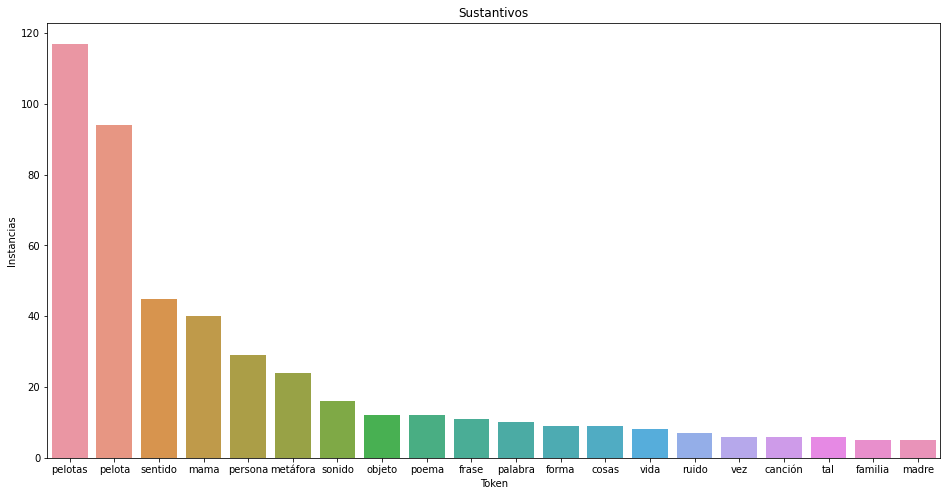

In [47]:
excep = { # 'se almacena': 'se suma y se destruye'
    'mama': 'mamas',
    'madre': 'mama',
    'pelota': 'pelotas',
    'persona': 'personas'
}
data = extract_data(df_1_1,excep)
plot_freq_dist(data['sustantivos'],'Sustantivos',most_common,print_df=print_df_var)

### Resultados Prueba 2

### Resultados Prueba 3